# 편의점 시급 데이터 분석

In [1]:
# 필요 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import scipy.stats as stats
# Jupyter Notebook에서 Matplotlib 출력을 위한 설정
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# Matplotlib 출력 크기 설정
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

In [2]:
data = pd.read_csv('data/convenient_store.csv', encoding='euc-kr')
data.head(8)

,area,company,hourly_wage,area1,area2,outlier,name
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25
5,구로구 구로동,gs25구로동양점,6000,구로구,구로동,0,gs25
6,구로구 구로동,gs25구로동양점,5580,구로구,구로동,0,gs25
7,동대문구 장안동,gs25장안중앙점,5600,동대문구,장안동,0,gs25


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
area           177 non-null object
company        177 non-null object
hourly_wage    177 non-null int64
area1          177 non-null object
area2          177 non-null object
outlier        177 non-null int64
name           177 non-null object
dtypes: int64(2), object(5)
memory usage: 9.8+ KB


레코드 수: 177개
컬럼 수: 7개

In [11]:
data.describe()

,hourly_wage,outlier
count,177.000000,177.0
mean,5787.627119,0.0
std,352.318646,0.0
min,5580.000000,0.0
25%,5580.000000,0.0
50%,5600.000000,0.0
75%,6000.000000,0.0
max,7500.000000,0.0


실수형 값들에 대한 기술통계

In [12]:
data.area.describe()

count         177
unique        117
top       강남구 논현동
freq            7
Name: area, dtype: object

빈도 표출

데이터 필터링

이번엔 시급이 6000원 이상 되는 항목들을 추출

In [13]:
high_wage = data[data.hourly_wage >= 6000]

In [14]:
high_wage.head()

,area,company,hourly_wage,area1,area2,outlier,name
5,구로구 구로동,gs25구로동양점,6000,구로구,구로동,0,gs25
9,성동구 금호동4,gs25 서울숲푸르지오점,6000,성동구,금호동4,0,gs25
13,영등포구 영등포동,gs25,6300,영등포구,영등포동,0,gs25
18,강남구 논현동,세븐일레븐 논현11호점,6200,강남구,논현동,0,7/11
27,강남구 대치동,세븐일레븐 대치3호점,6000,강남구,대치동,0,7/11


시급을 기준으로 내림차순으로 정렬 sort_values()

In [15]:
high_wage.sort_values(by='hourly_wage', ascending=0).head(10)

,area,company,hourly_wage,area1,area2,outlier,name
173,용산구 이태원동,CU 이태원프리덤점,7500,용산구,이태원동,0,CU
29,강남구 논현동,세븐일레븐편의점,7500,강남구,논현동,0,7/11
160,서대문구 신촌동,BGF Retail CU 신촌세브란스병원점,6900,서대문구,신촌동,0,CU
135,중구 명동2가,세븐일레븐,6690,중구,명동2가,0,7/11
172,용산구 한남동,CU 한남리첸시아점,6600,용산구,한남동,0,CU
37,강서구 등촌동,세븐일레븐 서울호서대점,6600,강서구,등촌동,0,7/11
161,서대문구 현저동,CU 독립문극동점,6500,서대문구,현저동,0,CU
89,성동구 사근동,세븐일레븐 한양대학교병원점,6500,성동구,사근동,0,7/11
72,마포구 동교동,세븐일레븐 마포홍익점,6500,마포구,동교동,0,7/11
30,강남구 청담동,세븐일레븐 청담그린점,6500,강남구,청담동,0,7/11


이태원과 강남 논현동의 편의점은 시급 7,500원..

2가지 조건 적용, 마포구에 있으면서 시급이 6,000원 이상인 데이터 추출 -> & 연산자

In [107]:
b = data[(data.hourly_wage >= 6000) & (data.area1 =='마포구')]
b

,area,company,hourly_wage,area1,area2,outlier,name
66,마포구 성산2동,세븐일레븐 마포 성산대로점,6000,마포구,성산2동,0,7/11
68,마포구 서교동,세븐일레븐 홍대클럽점,6000,마포구,서교동,0,7/11
72,마포구 동교동,세븐일레븐 마포홍익점,6500,마포구,동교동,0,7/11


특정 문자가 포함된 데이터 추출 -> contains()

In [108]:
cu = data[data.company.str.contains('CU')]
cu.head()

,area,company,hourly_wage,area1,area2,outlier,name
141,강남구 논현동,CU 논현힐탑점,5600,강남구,논현동,0,CU
142,강남구 논현동,CU논현한미점,6000,강남구,논현동,0,CU
143,강남구 신사동,CU 로데오점,6100,강남구,신사동,0,CU
144,강남구 대치4동,CU 대치본점,6000,강남구,대치4동,0,CU
145,강남구 논현1동,CUBE pc방,6500,강남구,논현1동,0,CU


CUBE PC방도 포함.. -> contains(): 대소문자 구분
data[data.company.str.upper().str.contains('PC')

In [16]:
cu = data[data.company.str.contains('pc방')]
cu.head()

,area,company,hourly_wage,area1,area2,outlier,name
145,강남구 논현1동,CUBE pc방,6500,강남구,논현1동,0,CU


컬럼을 새로 추가할 땐 그냥 없는 컬럼에 값을 대입하는 코드를 쓰면 됩니다. seoul 이라는 컬럼을 추가하고 값에 in seoul 을 넣어보겠습니다.

In [111]:
#컬럼 접근 시 data.company는 되지만, 컬럼 생성시엔 data['']만 가능함
data['seoul'] = 'in seoul'
data.head()

,area,company,hourly_wage,area1,area2,outlier,name,seoul
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25,in seoul
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25,in seoul
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25,in seoul
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25,in seoul
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25,in seoul


DataFrame 객체의 값에 접근 시, data['company'] 와 같이 값을 접근 할 수도 있고 data.company 와 같이 접근 가능
단, 다만 컬럼 생성시엔 data['new_column'] 만 사용할 수 있음

In [112]:
data['more_than_6000'] = data.hourly_wage > 6000
data.head()

,area,company,hourly_wage,area1,area2,outlier,name,seoul,more_than_6000
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25,in seoul,False
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25,in seoul,False
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25,in seoul,False
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25,in seoul,False
4,광진구 중곡동,gs25중곡대원점,5580,광진구,중곡동,0,gs25,in seoul,False


- 시급 6,000원 이상인 항목에만 기술통계 분석
- more_than_6000 컬럼에 명시

In [113]:
data[data.more_than_6000 == True].describe()

,hourly_wage,outlier
count,25.000000,25.0
mean,6518.000000,0.0
std,343.923441,0.0
min,6100.000000,0.0
25%,6300.000000,0.0
50%,6500.000000,0.0
75%,6500.000000,0.0
max,7500.000000,0.0


그럼 조건을 이용한 컬럼 생성 시, 특정 값 입력을 위해 함수 생성

In [115]:
def more_than_6000(x):
    if x > 6000:
        return 'A Group'
    else:
        return 'B Group'

전체 데이터에서 구 정보와 시급 데이터만을 추출하여 시급 기준 내림차순으로 정렬

In [116]:
data['more_than_6000_2'] = data.hourly_wage.map(lambda x : more_than_6000(x))
data.head(4)

,area,company,hourly_wage,area1,area2,outlier,name,seoul,more_than_6000,more_than_6000_2
0,강남구 삼성동,gs25 오크우드점,5600,강남구,삼성동,0,gs25,in seoul,False,B Group
1,강남구 삼성동,gs25 코엑스점,5700,강남구,삼성동,0,gs25,in seoul,False,B Group
2,강서구 화곡동,gs25편의점,5600,강서구,화곡동,0,gs25,in seoul,False,B Group
3,광진구 군자동,gs25,5580,광진구,군자동,0,gs25,in seoul,False,B Group


In [118]:
data2 = data[data.more_than_6000 == True][['area1', 'hourly_wage']]
data2 = data2.sort_values(by='hourly_wage', ascending=0)
data2

,area1,hourly_wage
173,용산구,7500
29,강남구,7500
160,서대문구,6900
135,중구,6690
37,강서구,6600
172,용산구,6600
30,강남구,6500
53,구로구,6500
60,도봉구,6500
161,서대문구,6500


결과 저장(CSV)..

In [119]:
data2.to_csv('data/data2.csv', index=False)

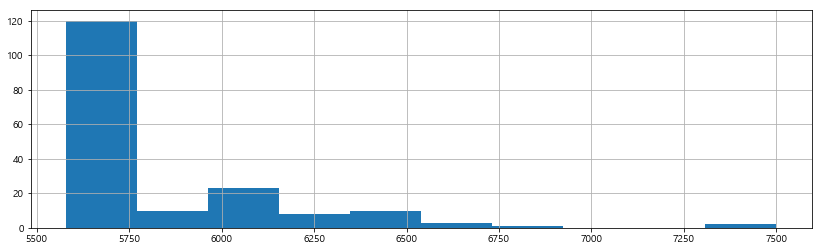

In [84]:
data.hourly_wage.hist(bins=10)
plt.show()

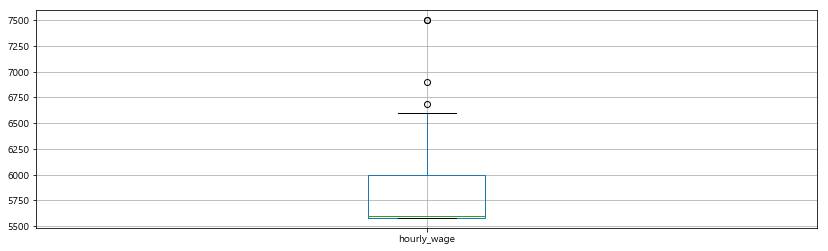

In [18]:
data.boxplot(column='hourly_wage', return_type='dict')
plt.show()

회사별 시각화

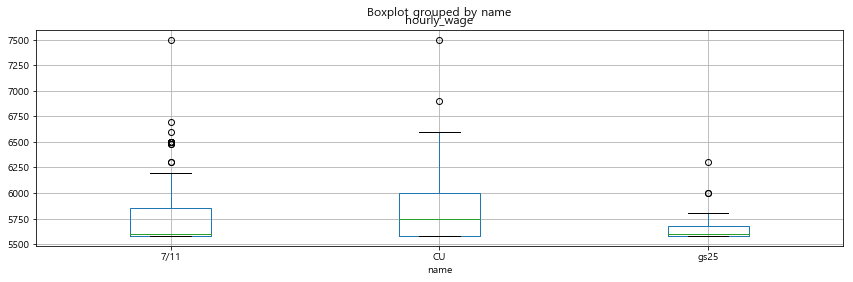

In [121]:
data.boxplot(column='hourly_wage', by='name')

-CU...
-area1: 구단위 주소

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 25 Text xticklabel objects>)

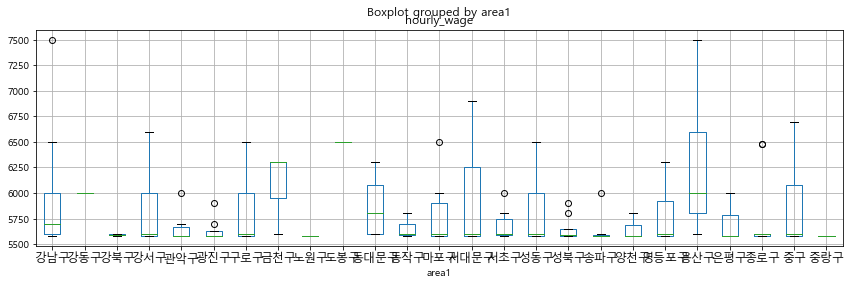

In [122]:
# 지역구별 박스플롯
data.boxplot(column='hourly_wage', by='area1')
plt.xticks(fontsize=12) # 폰트 사이즈 설정

(array([5250., 5500., 5750., 6000., 6250., 6500., 6750., 7000., 7250.,
        7500., 7750.]), <a list of 11 Text xticklabel objects>)

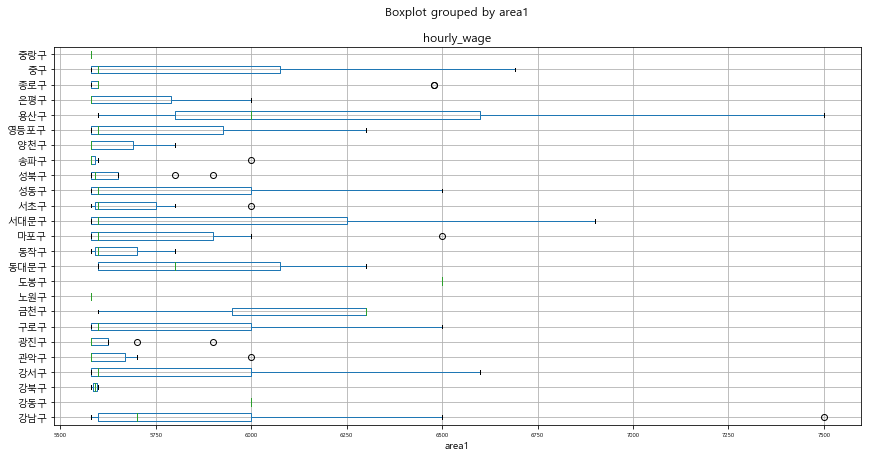

In [126]:
plt.rcParams["figure.figsize"] = (14,7)
data.boxplot(column='hourly_wage', by='area1', vert=False)
plt.xticks(fontsize=6) # 폰트 사이즈 설정


##### End of Document